In [1]:
import numpy as np 
import sys
import math 
from numpy.linalg import norm  

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# <span style="color:#2ac965;"> Perceptron Functions </span>

In [2]:
def batch_perceptron(X, Y, learning_rate = 1):

    """
    Parameters
    ----------
    X : list
        Input Feature to the model
    Y : list
        Input labels to the model
    learning_rate : int, optional
        the learning rate of the model

    Returns
    ----------
    weights: list
        the final weights calculated from the model after the error reaches zero
    weight_steps: list
        every update that happend to the weights while learning    
    plot: list
        all deltas that were used in the learning process
    """

    n = X.shape[1]
    data_len = len(X)
    weights = np.random.uniform(low=-1, high=1, size=(n,))
    error = sys.float_info.epsilon
    delta = np.ones(n)
    weight_steps = []

    plot = np.array([])
    epochs = 0

    while (norm(delta, 1) > error):
        if (epochs == 10000):
            print("data not linearly seperable")
            break
        
        delta = np.zeros(n)

        for i in range(data_len):
            u = weights.dot(X[i])

            if Y[i] * u <= 0:
                delta = delta - (Y[i] * X[i])

        delta = delta / data_len
        weights = weights - learning_rate * delta
        weight_steps.append(weights)
        plot = np.append(plot, norm(delta, 1))

        epochs += 1

    return weights, weight_steps, plot

In [3]:
def online_batch_perceptron(X, Y, learning_rate = 1):

    """
    Parameters
    ----------
    X : list
        Input Feature to the model
    Y : list
        Input labels to the model
    learning_rate : int, optional
        the learning rate of the model

    Returns
    ----------
    weights: list
        the final weights calculated from the model after the error reaches zero
    weight_steps: list
        every update that happend to the weights while learning    
    plot: list
        all deltas that were used in the learning process
    epochs: int
        number of epochs in the learning process
    """

    n = X.shape[1]
    data_len = len(X)
    weights = np.random.uniform(low=-1, high=1, size=(n,))
    error = sys.float_info.epsilon
    delta = np.ones(n)
    weight_steps = []

    plot = np.array([])
    epochs = 0

    while (norm(delta, 1) > error):
        if (epochs == 1000):
            print("data not linearly seperable")
            break

        delta = np.zeros(n)

        for i in range(data_len):
            u = weights.dot(X[i])

            if Y[i] * u <= 0:
                delta = delta - (Y[i] * X[i])
                delta = delta / data_len
                weights = weights - (learning_rate * delta)
                weight_steps.append(weights)
                plot = np.append(plot, norm(delta, 1))

        epochs += 1

    return weights, weight_steps, plot, epochs

# <span style="color:#2ac965;"> Problem 1 </span>


In [16]:
x = np.array([[50, 55, 70, 80, 130, 150, 155, 160],
                [1, 1, 1, 1, 1, 1, 1, 1]]).T
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

In [17]:
weights, weight_steps, delta1 = batch_perceptron(x, y)

In [18]:
len(weight_steps)

2491

In [19]:
weights_online, weight_steps_online, delta1_online, epochs1 = online_batch_perceptron(x, y)

In [20]:
len(weight_steps_online), epochs1

(191, 63)

# <span style="color:#2ac965;"> Problem 4 </span>

In [31]:
x = np.array([[0, 0, 0, 1],
                [255, 0, 0, 1],
                [0, 255, 0, 1],
                [0, 0, 255, 1],
                [255, 255, 0, 1],
                [0, 255, 255, 1],
                [255, 0, 255, 1],
                [255, 255, 255, 1]])
                
y = np.array([1, 1, 1, -1, 1, -1, -1, 1])

In [32]:
weights, weight_steps, delta4 = batch_perceptron(x, y)

In [33]:
len(weight_steps)

8

In [34]:
weights_online, weight_steps_online, delta4_online, epochs4 = online_batch_perceptron(x, y)

In [35]:
len(weight_steps_online), epochs4

(12, 7)

# <span style="color:#2ac965;"> Comparison Plots </span>

## Problem 1

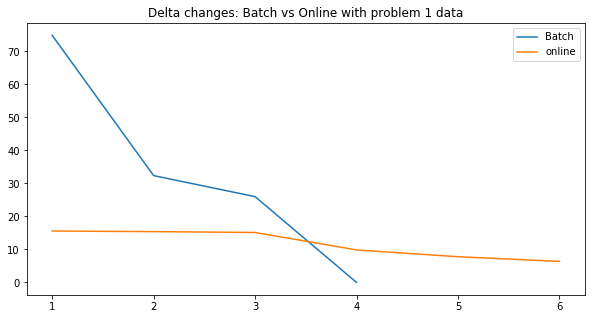

In [36]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

#delta1 = np.unique(delta1)
x = np.arange(1, (len(np.unique(delta1))+1))
sns.lineplot(x, np.unique(delta1)[::-1], ax=ax, label="Batch")

x = np.arange(1, (len(np.unique(delta1_online))+1))
sns.lineplot(x, np.unique(delta1_online)[::-1], ax=ax, label="online")

plt.title("Delta changes: Batch vs Online with problem 1 data")
plt.savefig("problem1_online_vs_batch.png")

## Problem 4

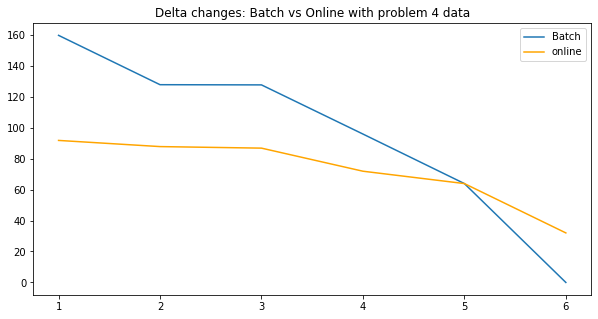

In [37]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

#delta1 = np.unique(delta1)
x = np.arange(1, (len(np.unique(delta4))+1))
sns.lineplot(x, np.unique(delta4)[::-1], ax=ax, label="Batch")

x = np.arange(1, (len(np.unique(delta4_online))+1))
sns.lineplot(x, np.unique(delta4_online)[::-1], ax=ax, label="online", color="orange")

plt.title("Delta changes: Batch vs Online with problem 4 data")
plt.savefig("problem4_online_vs_batch.png")

# <span style="color:#2ac965;"> Part 2: Generated data </span>

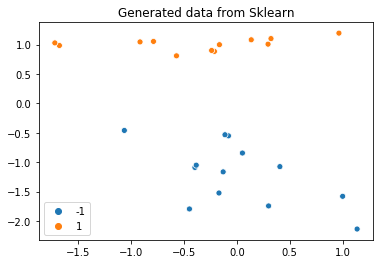

In [66]:
x,y = make_classification(n_samples=25,n_features=2,n_redundant = 0,
                            n_informative=1,n_clusters_per_class=1)

mask_for_y = y == 0
y[mask_for_y] = -1
sns.scatterplot(x[:, 0], x[:, 1], hue=y,  
                palette="tab10", legend="full")

plt.title("Generated data from Sklearn")
plt.savefig("generated.png")

In [67]:
x_train, x_test, y_train, y_test = train_test_split(
                x, y, test_size=0.25, random_state=5)

In [68]:
weights_gen, weight_steps_gen, delta_generated_batch = batch_perceptron(x_train, y_train)

In [69]:
len(weight_steps_gen)

4

In [70]:
weights_gen_online, weight_steps_gen_online, delta_generated_online, epochs_gen_online = online_batch_perceptron(x_train, y_train)

In [71]:
len(weight_steps_gen_online), epochs_gen_online

(17, 3)

Training plot

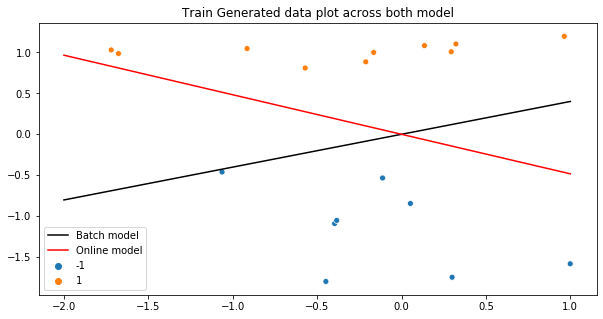

In [72]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=y_train, ax=ax, 
                        palette="tab10", legend="full")

line = np.arange(math.floor(np.amin(x_train[:, 0])), 
                    math.ceil(np.amax(x_train[:, 0]) + 1))

if weights_gen[1] != 0:
    slope = -weights_gen[0] / weights_gen[1] 

else:
    slope = -weights_gen[0] / 0.1 

sns.lineplot(line, line * slope, color="k", label="Batch model")

if weights_gen_online[1] != 0:
    slope_online = -weights_gen_online[0] / weights_gen_online[1] 

else:
    slope_online = -weights_gen_online[0] / 0.1 

sns.lineplot(line, line * slope_online, color="r", label="Online model")

plt.title("Train Generated data plot across both model")
plt.savefig("training_plot.png")

Test plot

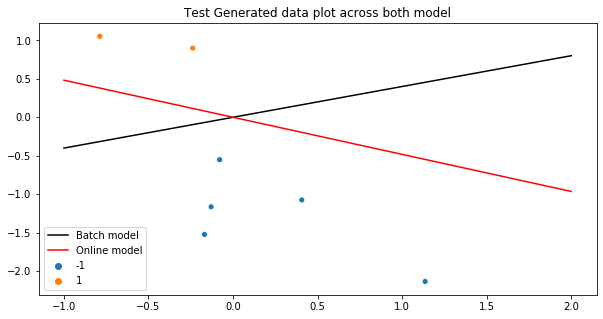

In [73]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(x_test[:, 0], x_test[:, 1], hue=y_test, ax=ax, 
                        palette="tab10", legend="full")

line = np.arange(math.floor(np.amin(x_test[:, 0])), 
                    math.ceil(np.amax(x_test[:, 0]) + 1))

sns.lineplot(line, line * slope, color="k", label="Batch model")
sns.lineplot(line, line * slope_online, color="r", label="Online model")

plt.title("Test Generated data plot across both model")
plt.savefig("testing_plot.png")

# <span style="color:#2ac965;"> Part 2: Accuracy </span>

Train accuracy

In [74]:
y_pred = x_train.dot(weights_gen)

y_pred = np.where(y_pred < 0, -1, 1)

print(confusion_matrix(
    y_pred, y_train))

print(classification_report(y_train, y_pred))

[[ 8  0]
 [ 0 10]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [75]:
y_pred = x_train.dot(weights_gen_online)

y_pred = np.where(y_pred < 0, -1, 1)

print(confusion_matrix(
    y_pred, y_train))

print(classification_report(y_train, y_pred))

[[ 8  0]
 [ 0 10]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Test Accuracy

In [76]:
y_pred = x_test.dot(weights_gen)

y_pred = np.where(y_pred < 0, -1, 1)

print(confusion_matrix(
    y_pred, y_test))

print(classification_report(y_test, y_pred))

[[5 0]
 [0 2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [77]:
y_pred = x_test.dot(weights_gen_online)

y_pred = np.where(y_pred < 0, -1, 1)

print(confusion_matrix(
    y_pred, y_test))

print(classification_report(y_test, y_pred))

[[5 0]
 [0 2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



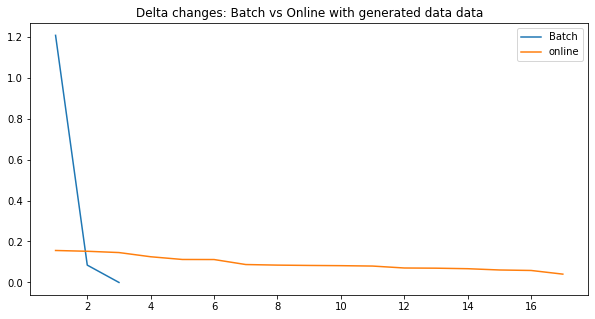

In [78]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

#delta1 = np.unique(delta1)
x = np.arange(1, (len(np.unique(delta_generated_batch))+1))
sns.lineplot(x, np.unique(delta_generated_batch)[::-1], ax=ax, label="Batch")

x = np.arange(1, (len(np.unique(delta_generated_online))+1))
sns.lineplot(x, np.unique(delta_generated_online)[::-1], ax=ax, label="online")

plt.title("Delta changes: Batch vs Online with generated data data")
plt.savefig("generated_data_online_vs_batch.png")